In [1]:
import pickle
import os
import re
import fnmatch
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    
    return results

# Training and Validation Curves

In [150]:
filebase = ("Unet_round2__epochs_15__LR_0-001000_ntrain_03_rot_*_results.pkl") #Select this ntraining number resultsresultsList = read_all_rotations('results/P1', filebase) #Read all of those into resultsList
resultsList = read_all_rotations('results', filebase) #Read all of those into resultsList


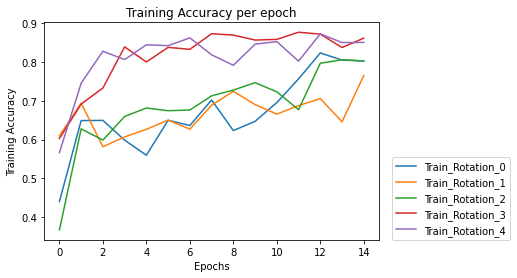

In [151]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['sparse_categorical_accuracy'], label=(("Train_Rotation_%s")%(str(i))))

plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.title("Training Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure1.png')
plt.show()

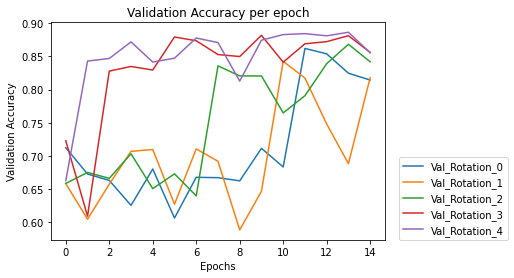

In [152]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['val_sparse_categorical_accuracy'], label=(("Val_Rotation_%s")%(str(i))))

plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title("Validation Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure2.png')
plt.show()

# Confusion Matrices

In [126]:
from tensorflow import keras


# Load the tensorflow generator
test_dat = create_dataset(base_dir='radiant_earth/pa', partition='valid', fold=0, filt='*',
                          batch_size=8, prefetch=2, num_parallel_calls=4)
#def generate_CM()
# Load the model for this batch
model = keras.models.load_model('results/Unet_round1__epochs_10__LR_0-001000_ntrain_03_rot_00_model')

# Generate results data
ins_test = []
outs_test = []
preds_test = []
labels_test = []
for i in test_dat:
    ins = i[0].numpy()
    outs = i[1].numpy()
    ins_test.append(ins)
    outs_test.append(outs)
    preds = model.predict(ins)
    preds_test.append(preds)
    labels = np.argmax(preds, axis=3)
    labels_test.append(labels)
    
ins_test = np.concatenate(ins_test,axis=0)
outs_test = np.concatenate(outs_test,axis=0)
preds_test = np.concatenate(preds_test, axis=0)
labels_test = np.concatenate(labels_test, axis=0)

preds_test = np.argmax(model.predict(test_dat), axis=3) # Get the predictions from the test data


tf.Tensor(b'radiant_earth\\pa\\valid\\F0\\pa_1m_2013-m_4107530_sw_18_1-0.npz', shape=(), dtype=string)
32/32 [==============================] - 24s 729ms/step - loss: 0.4533 - sparse_categorical_accuracy: 0.8441


In [146]:
labels_test.shape

(250, 256, 256)

In [159]:
flatLabels = labels_test.flatten()

In [158]:
flatOuts = outs_test.flatten()

In [163]:
np.unique(flatOuts)

array([1, 2, 3, 4, 5, 6], dtype=int8)

In [160]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(flatOuts, flatLabels)

In [162]:
cm

array([[      0,  212044,   83646,       0,       0,       0],
       [      0, 8759714,  655235,       0,       0,       0],
       [      0, 1073895, 5070144,       0,       0,       0],
       [      0,    1310,   55608,       0,       0,       0],
       [      0,   12243,  310079,       0,       0,       0],
       [      0,   19186,  130896,       0,       0,       0]],
      dtype=int64)

<AxesSubplot:>

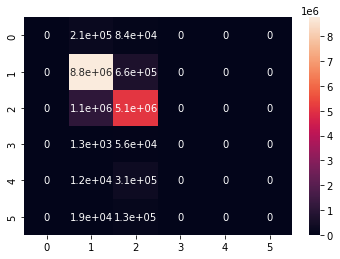

In [161]:
import seaborn as sns

sns.heatmap(cm, annot=True)

In [127]:
results = model.evaluate(test_dat)

32/32 [==============================] - 27s 837ms/step - loss: 0.4533 - sparse_categorical_accuracy: 0.8441


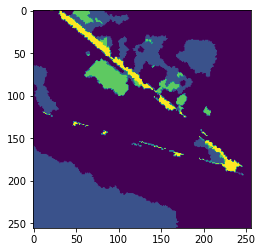

In [155]:

plt.imshow(outs_test[0,:,:])

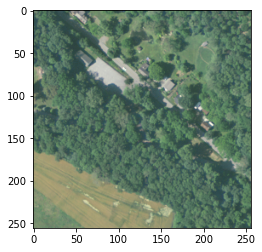

In [156]:
plt.imshow(ins_test[0,:,:,0:3])

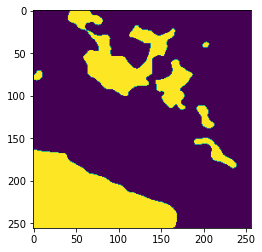

In [157]:
plt.imshow(labels_test[0,:,:])

# Histograms of Test Results

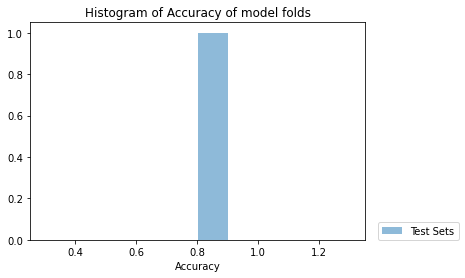

In [10]:
trainList, valList, testList = getResults(resultsList, 1)


plt.hist([testList], bins=10, alpha=0.5, label=['Test Sets'])
#plt.hist([complexModel], bins=10, alpha=0.5, label=['Complex Model'])
#plt.axvline(np.mean(testAcc), color='k', linestyle='dashed', linewidth=1, label='Mean Acc')
plt.legend(loc=(1.04,0))
plt.xlabel('Accuracy')
plt.title("Histogram of Accuracy of model folds")
plt.savefig('Figure8.png')
plt.show()

In [80]:
sample = resultsList[0]['sample']

In [88]:
sample[0]

array([0.27450982, 0.38039216, 0.34509805, 0.7058824 , 0.3529412 ,
       0.42745098, 0.4509804 , 0.76862746, 0.062625  , 0.06525   ,
       0.10825   , 0.0735    , 0.727625  , 0.376125  , 0.1685    ,
       0.736375  , 0.73075   , 0.053     , 0.05525   , 0.08      ,
       0.08      , 0.364875  , 0.32175   , 0.185375  , 0.697625  ,
       0.69675   ], dtype=float32)

In [ ]:
sample[0][0]

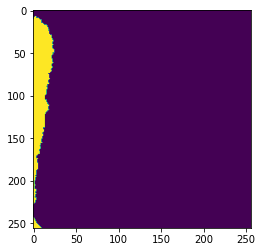

In [104]:
# Okay, first index is the batch number I think, then the second is 0,1 and those stand for image vs. true label. After that, inside the brackets is image, rows, columns 
#(then channels if looking at the real image). So I can't use this as it is I think. 
plt.imshow(sample[0][1][1,:,:]) 

# Images

In [78]:
ind=1

# This gives what the predicted labels are
prediction = resultsList[ind]['predict_training']
image = resultsList[ind]['sample'][0]
trueLabel = resultsList[ind]['sample'][1]

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 3
columns = 1# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image[ind,:,:, 0:3])
plt.axis('off')
plt.title("Satellite")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(trueLabel[ind,:,:])
plt.axis('off')
plt.title("True Labels")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(prediction[ind,:,:])
plt.axis('off')
plt.title("Predicted Labels")

plt.savefig('Figure9.png')

IndexError: list index out of range